# Geospatial v1 

In [1]:
import uuid
import geopandas as gpd, pandas as pd
import os
from shapely import wkt
from shapely.geometry.multipolygon import MultiPolygon
from cognite.client import ClientConfig, CogniteClient
from cognite.client.credentials import OAuthClientCredentials
from cognite.client.data_classes.geospatial import (Feature,FeatureType,FeatureList)
import contextily as ctx

In [2]:
%matplotlib widget

## Feature types and features

### Create Cognite API client

In [3]:
credentials = OAuthClientCredentials(
    token_url=os.environ["COGNITE_TOKEN_URL"],
    client_id=os.environ["COGNITE_CLIENT_ID"],
    client_secret=os.environ["COGNITE_CLIENT_SECRET"],
    scopes=os.environ["COGNITE_TOKEN_SCOPES"].split(","),
)
client = CogniteClient(ClientConfig(
        client_name=os.environ["COGNITE_CLIENT_NAME"],
        project=os.environ["COGNITE_PROJECT"],
        base_url=os.environ["COGNITE_BASE_URL"],
        credentials=credentials,
    ))

In [4]:
client.geospatial.list_feature_types()

,external_id,created_time,last_updated_time,properties,search_spec
0,vincent_test2,1671185787175,1671185787175,"{'tag': {'type': 'STRING', 'size': 10}, 'x': {...",{'externalIdIdx': {'properties': ['externalId'...
1,hackxmas,1671192807501,1671192807501,"{'ts': {'type': 'LONG', 'optional': True}, 'ta...",{'externalIdIdx': {'properties': ['externalId'...
2,waypoints,1671193350690,1671193350690,"{'waypoint_id': {'type': 'STRING', 'size': 100...",{'externalIdIdx': {'properties': ['externalId'...


In [5]:
points = client.geospatial.list_features(feature_type_external_id="hackxmas",
                               filter={"range": {"property": "ts", "gt": 1671192040000}},
                               properties={"pos_wgs84": {}},
                                limit=-1)

In [6]:
df = points.to_geopandas(geometry="pos_wgs84")
df

,pos_wgs84
0,POINT (10.62525 59.90497)
1,POINT (10.62525 59.90497)
2,POINT (10.62525 59.90497)
3,POINT (10.62525 59.90497)
4,POINT (10.62525 59.90497)
...,...
4659,POINT (10.62525 59.90497)
4660,POINT (10.62525 59.90497)
4661,POINT (10.62525 59.90497)
4662,POINT (10.62525 59.90497)


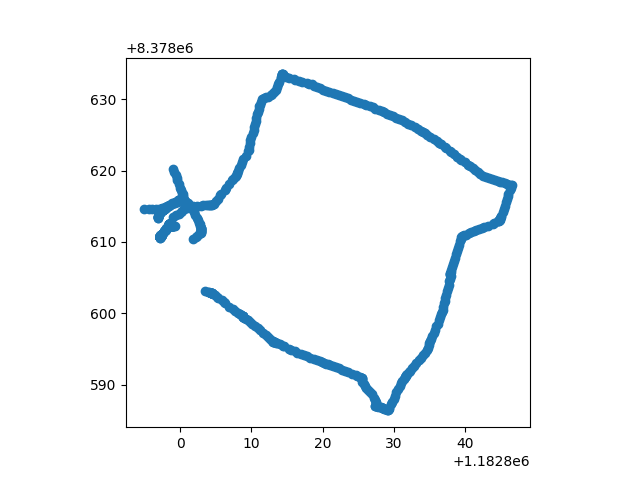

In [7]:
df = df.set_crs('epsg:4326')
df = df.to_crs(epsg=3857)
ax = df.plot()

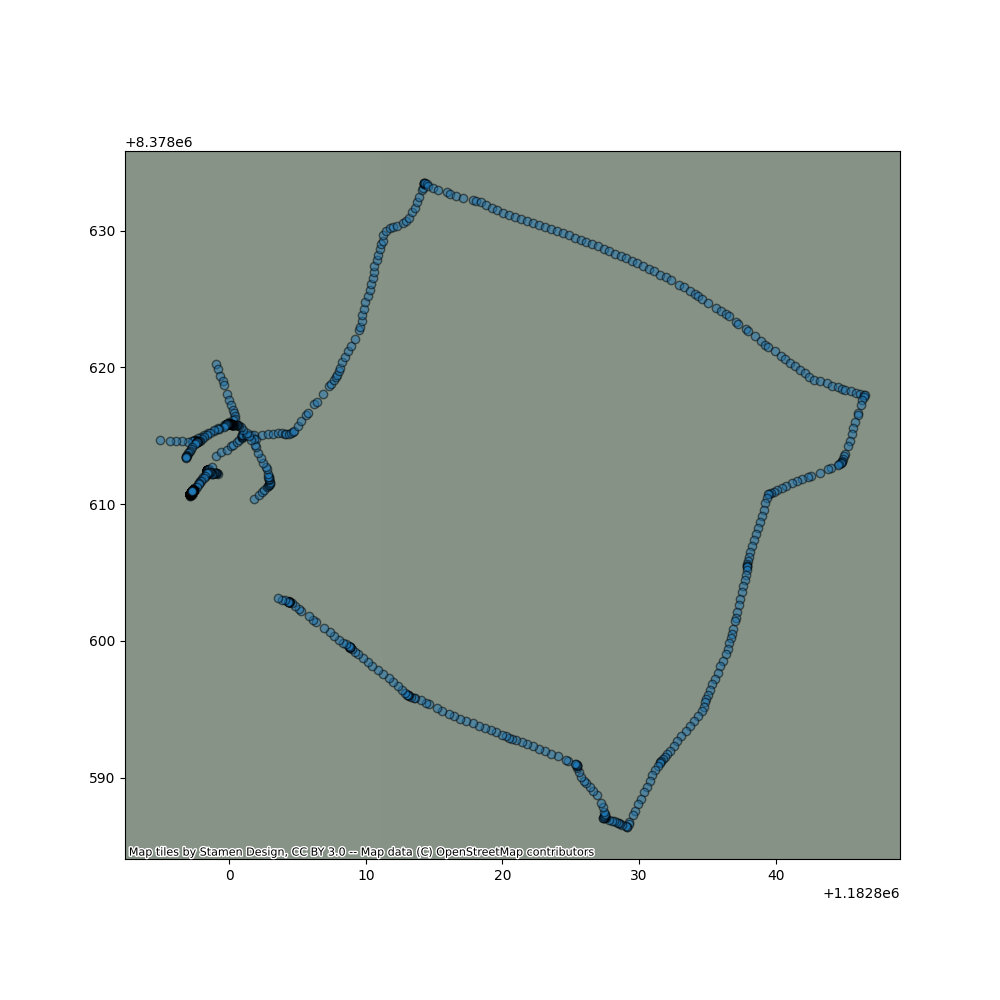

In [8]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=5)

In [12]:
import matplotlib.pyplot as plt

/home/novpla/.cache/pypoetry/virtualenvs/geospatial-examples-xXej8eEu-py3.8/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.


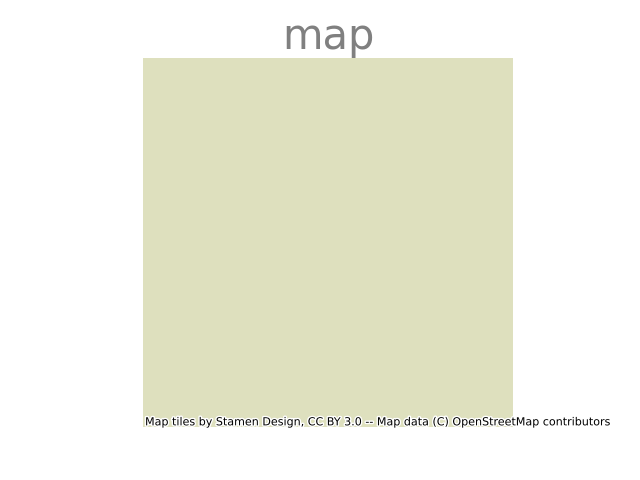

In [13]:
fig, ax = plt.subplots()
ctx.add_basemap(ax, url=ctx.providers.CartoDB.Positron) 
plt.title("map", fontsize=30, fontname="Palatino Linotype", color="grey")
ax.axis("off")
plt.show()